In [1]:
from matplotlib import rcParams
rcParams['font.family'] = 'Century Gothic'
rcParams['font.sans-serif'] = ['Tahoma']
rcParams['font.weight'] = 'bold'
rcParams['font.size'] = '13'
rcParams['axes.labelsize']='medium'
rcParams['axes.titlesize']='large'

In [2]:
import pandas as pd
import numpy as np

In [15]:
params=["Long Pass Completion %","Progressive Passes","Progressive Carries","SCA (PassLive)","Blocks","Interceptions","Tackles","Clearances","Pressures (Mid 3rd)","% of Aerials Won"]
print(len(params))
#Bastoni
percentile_b=[66,83,99,88,19,20,39,1,66,58] 
stats_b=[73.9,3.98,6.98,0.74,1.33,1.03,1.33,2.59,3.80,64.6]

#Bonucci
percentile_bon=[78,77,41,50,41,10,10,9,30,66]
stats_bon=[77.1,3.60,2.33,0.43,1.56,0.90,0.93,3.56,2.73,66.2]

#Chielini
percentile_c=[80,80,54,84,46,41,24,20,18,66]
stats_c=[77.4,3.81,2.77,0.69,1.62,1.27,1.15,4.04,2.42,66.1]

#Romagnoli
percentile_a=[71,43,14,53,77,4,12,35,71,84]
stats_a=[75.3,2.41,1.26,0.44,1.96,0.78,0.96,4.59,3.93,71.0]

df = pd.DataFrame(list(zip(params, percentile_a,stats_a)),columns =["Stat","Percentile","Value"])
df

10


,Stat,Percentile,Value
0,Long Pass Completion %,71,75.30
1,Progressive Passes,43,2.41
2,Progressive Carries,14,1.26
3,SCA (PassLive),53,0.44
4,Blocks,77,1.96
5,Interceptions,4,0.78
6,Tackles,12,0.96
7,Clearances,35,4.59
8,Pressures (Mid 3rd),71,3.93
9,% of Aerials Won,84,71.00


In [4]:
import matplotlib.pyplot as plt

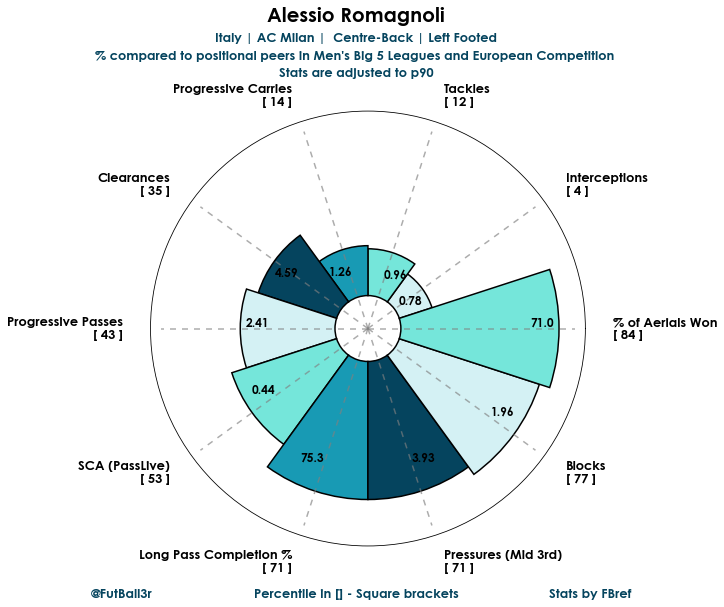

In [16]:
# set figure size
fig, ax = plt.subplots(figsize=(13, 8))
rcParams["text.color"]="black"
# plot polar axis
ax = plt.subplot(111, polar=True)
# remove grid
plt.axis('on')
df = df.sort_values(by=['Percentile'])

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Set the coordinates limits
upperLimit = 100
lowerLimit = 15
labelPadding = 4

# Compute max and min in the dataset
max = df['Percentile'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Percentile + lowerLimit
# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.Percentile)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit+2.5,
    linewidth=1.5,
    color=["#D4F1F4","#75E6DA","#189AB4","#05445E"],
    edgecolor="black",
)

ax.vlines(angles, 0, 110, color="grey",alpha=0.65,ls=(0, (4, 4)))

for bar, angle, height, label,sv,pv in zip(bars,angles, heights, df["Value"],df["Stat"],df["Percentile"]):

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
    else: 
        alignment = "left"
    
    # Finally add the labels
    ax.text(
        x=angle, 
        y=bar.get_height() + labelPadding -2, 
        s=label, 
        ha=alignment, 
        va='bottom',
        color='black',
        fontsize=12
       ) 
    
    # Finally add the labels
    ax.text(
        x=angle, 
        y=130, 
        s=sv+'\n'+'[ '+str(pv)+' ]', 
        ha=alignment, 
        va='center',
        fontsize=13
       ) 
    
# fig.text(0.5, 1.035,"Alessandro Bastoni",fontsize=20, ha="center", va="baseline")
# fig.text(0.5, 1.035,"Leonardo Bonucci",fontsize=20, ha="center", va="baseline")
# fig.text(0.5, 1.035,"Giorgio Chiellini",fontsize=20, ha="center", va="baseline")
fig.text(0.5, 1.035,"Alessio Romagnoli",fontsize=20, ha="center", va="baseline")
# fig.text(0.5, 1,"Italy | Inter |  Centre-Back | Left Footed",fontsize=13, ha="center", va="baseline",color="#05445E")
# fig.text(0.5, 1,"Italy | Juventus |  Centre-Back | Left Footed",fontsize=13, ha="center", va="baseline",color="#05445E")
fig.text(0.5, 1,"Italy | AC Milan |  Centre-Back | Left Footed",fontsize=13, ha="center", va="baseline",color="#05445E")
fig.text(0.5, 0.970,"% compared to positional peers in Men's Big 5 Leagues and European Competition ",fontsize=13, ha="center", va="baseline",color="#05445E")
fig.text(0.5, 0.940,"Stats are adjusted to p90",fontsize=13, ha="center", va="baseline",color="#05445E")
fig.text(0.5, 0.035,"Percentile in [] - Square brackets",fontsize=13, ha="center", va="baseline",color="#05445E")
fig.text(0.25, 0.035,"@FutBall3r",fontsize=13, ha="center", va="baseline",color="#05445E")
fig.text(0.75, 0.035,"Stats by FBref",fontsize=13, ha="center", va="baseline",color="#05445E")
plt.savefig('Romagnoli.png', bbox_inches='tight',dpi=500)